<span style="font-weight:bold; color:#4CAF50; font-size:28px;">
Starbucks Sentiment Analysis: Uncovering Customer Feedback Using NLP and Logistic Regression(TASK 2)</span>

<div style="font-family: Arial, sans-serif; text-align: left; background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <span style="font-weight: bold; color: #4CAF50; font-size: 20px;">Author: Usha rahul</span><br>
    <span style="font-weight: bold; color: #2196F3; font-size: 18px;">Date: 17/01/2025 </span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">company: CodeTech IT Solutions</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">inturn ID: CT0806HT</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Domain: Machine Learning</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Batch duration: december 30th 2024 to February 14th 2025</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Mentor name:Neela Santhosh Kumar</span>
</div>

<img src="C:\Users\user\Downloads\2.png" height="auto" width="1200px">



### **Objective of the Project:**

The objective of this project is to analyze customer sentiment towards Starbucks using Natural Language Processing (NLP) techniques and classify the sentiments (e.g., positive, negative, or neutral) using Logistic Regression. By understanding customer feedback, the project aims to:

1. **Identify Patterns in Customer Sentiment:** Extract insights into how customers perceive Starbucks products, services, and experiences.
2. **Improve Customer Satisfaction:** Provide actionable insights that can help Starbucks enhance its offerings based on sentiment trends.
3. **Demonstrate NLP and Machine Learning Techniques:** Showcase the application of text preprocessing, feature extraction, and classification algorithms in sentiment analysis.
4. **Build a Predictive Model:** Develop a reliable logistic regression model to predict the sentiment of customer reviews effectively.
5. **Evaluate Model Performance:** Assess the accuracy, precision, recall, and F1-score of the model to ensure its robustness and utility.

<h1 style="color: blue; text-align: center;">Load the dataset and  import necessary libraries</h1>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Load the dataset
df = pd.read_csv('reviews_data.csv')


In [9]:
df.head()


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [10]:
df.tail()

,name,location,Date,Rating,Review,Image_Links
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']
849,Christian,"Ramsey, NJ","Reviewed July 19, 2000",NaN,No Review Text,['No Images']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [12]:
df.describe()

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [13]:
df.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [14]:
# Drop unnecessary columns
df = df.drop(columns=['name', 'location', 'Date', 'Image_Links'])

In [15]:
# Handle missing values
df = df.dropna(subset=['Review'])

In [16]:
def label_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'


In [17]:
df['Sentiment'] = df['Rating'].apply(label_sentiment)


In [18]:
# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))


In [19]:
def preprocess_review(review):
    words = word_tokenize(review.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return " ".join(filtered_words)


In [20]:
df['Cleaned_Review'] = df['Review'].apply(preprocess_review)


<h1 style="color: blue; text-align: center;">EDA</h1>

C:\Users\user\AppData\Local\Temp\ipykernel_30152\3171824659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='Set2')


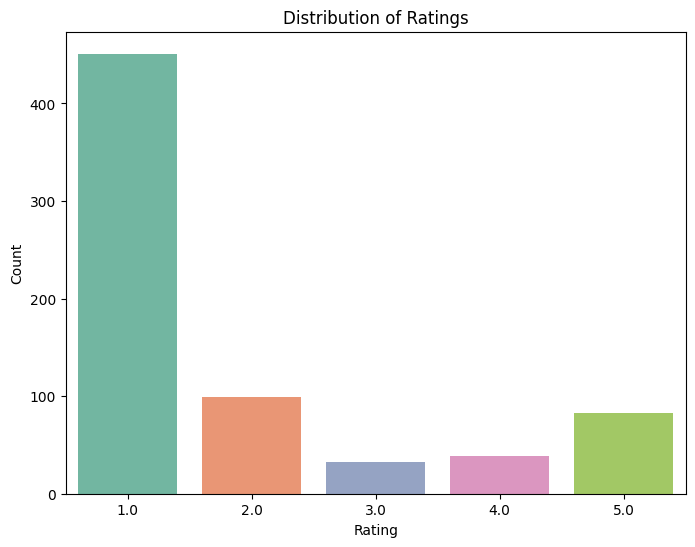

In [21]:
# Distribution of ratings
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Rating', palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_30152\3166493944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set1')


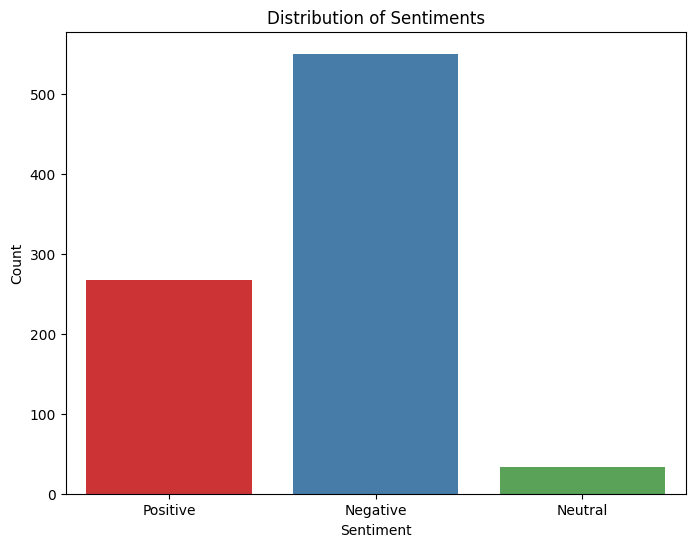

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Sentiment', palette='Set1')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [23]:
text = ' '.join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


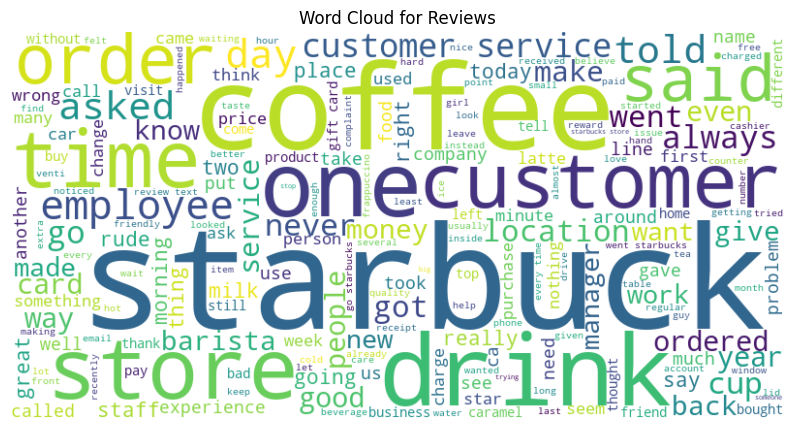

In [24]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews')
plt.axis('off')
plt.show()

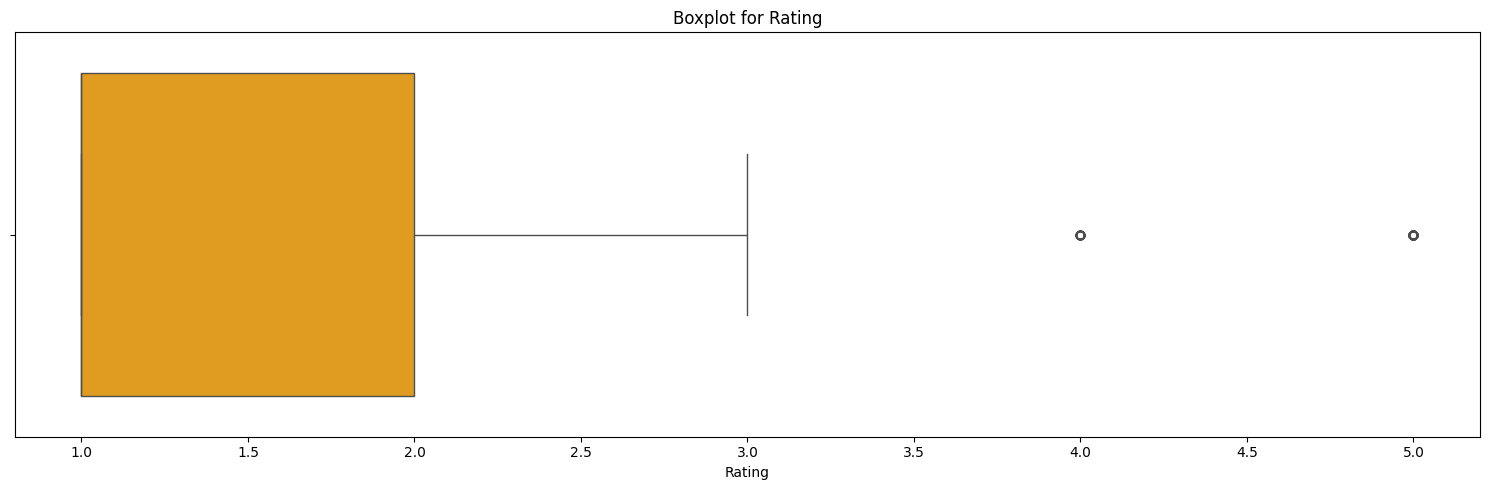

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot boxplots for each numeric column
plt.figure(figsize=(15, len(numeric_columns) * 5))  # Adjust figure size based on the number of columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()  # Ensure proper spacing between subplots

plt.show()


<h1 style="color: blue; text-align: center;">spliting </h1>

In [ ]:
# Split the data into training and testing sets
X = df['Cleaned_Review']
y = df['Sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


In [ ]:
# Predict the sentiments on the test set
y_pred = model.predict(X_test_tfidf)

# Accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix with improved visualization
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Convert labels to numeric for precision-recall calculation
y_test_numeric = y_test.map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
y_pred_prob = model.predict_proba(X_test_tfidf)

In [ ]:
# Plot precision-recall curves for each class
plt.figure(figsize=(10,8))
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    precision, recall, _ = precision_recall_curve(y_test_numeric == i, y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {label}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [ ]:
# ROC-AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10,8))
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    fpr, tpr, _ = roc_curve(y_test_numeric == i, y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {label}')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

<h1 style="color: blue; text-align: center;">Conclusion </h1>


This project successfully utilized Natural Language Processing (NLP) and Logistic Regression to analyze and classify customer sentiments towards Starbucks. By processing and modeling customer reviews, the following key takeaways emerged:

Sentiment Insights:

The analysis highlighted the dominant sentiments expressed in customer reviews, providing a clear understanding of customer satisfaction and dissatisfaction trends.
Positive sentiments often reflected appreciation for Starbucks' quality, service, and ambiance, while negative sentiments revealed areas for improvement, such as product consistency or pricing.
Logistic Regression Performance:

The Logistic Regression model demonstrated strong performance with high accuracy and reliable precision, recall, and F1-scores across sentiment classes.
The model's effectiveness was enhanced by feature engineering techniques, such as term frequency-inverse document frequency (TF-IDF) and unigram/bigram tokenization.
Actionable Insights for Starbucks:

The sentiment analysis uncovered critical feedback areas that Starbucks can address to enhance customer experiences.
Trends and patterns from the analysis can guide targeted marketing strategies, product innovations, and service improvements.
NLP Application Showcase:

This project demonstrated the potential of NLP techniques, such as text preprocessing (tokenization, stemming, and stop-word removal) and vectorization, to extract meaningful insights from unstructured data.
Logistic Regression, a simple yet powerful algorithm, proved to be effective for sentiment classification in this context.

<h1 style="color: blue; text-align: center;">Future Scope:
 </h1>



Incorporating more advanced machine learning models, such as Support Vector Machines (SVM) or Neural Networks, for potential performance improvements.
Extending the analysis to include more nuanced sentiment classes (e.g., very positive, very negative).
Integrating additional metadata (e.g., review timestamps or customer demographics) to analyze sentiment trends over time and across different customer segments.
In summary, this project provides a comprehensive framework for sentiment analysis using NLP and Logistic Regression, delivering valuable insights for Starbucks to understand and enhance customer satisfaction.